## 머신러닝에서 사용되는 전처리 기법

In [1]:
### 데이터 준비하기
# - 어제 사용한 도미와 빙어 데이터 가지고 오기...
# - 2차원 데이터까지 만들어 주세요~

In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [3]:
dom_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 
                30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 
                33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 
                39.5, 41.0, 41.0]

dom_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 
                390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 
                600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 
                685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 
                850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

bing_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

bing_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [4]:
length = dom_length + bing_length
weight = dom_weight + bing_weight

In [5]:
fish_data = [[leng, wei] for leng, wei in zip(length, weight)]
fish_target = [1] * 35 + [0] * 14

In [6]:
### numpy가 제공하는 함수를 이용한 2차원 데이터 생성하기
# 샘플
a = [1,2,3]
b = [4,5,6]
np.column_stack((a,b))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [7]:
fish_data = np.column_stack((length,weight))
fish_data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [8]:
###
print(np.ones(5))
print(np.zeros(5))

print(np.concatenate((np.ones(5), np.zeros(5))))

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


In [9]:
### Numpy를 이용해서 1과 0의 임의 값 만들기
# - 튜플 형태로 만들어야 합니다.
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## 훈련데이터세트와 테스트데이터세트 만들기
##### - 훈련데이터세트 : 독립변수의 훈련데이터와 target 데이터 생성
##### - 테스트데이터세트 : 독립변수의 테스트데이터와 target 데이터 생성
##### - train_data, train_target : 훈련에 사용
##### - test_data, test_target : 평가 및 예측에 사용

In [10]:
# 데이터 랜덤으로 뽑아올 인덱스 생성
np.random.seed(123)

index = np.arange(49)

np.random.shuffle(index)

In [11]:
## 훈련데이터 생성하기
train_input = fish_data[index[:35]]
train_target = fish_target[index[:35]]

In [12]:
## 테스트 데이터 생성하기
test_input = fish_data[index[35:]]
test_target = fish_target[index[35:]]

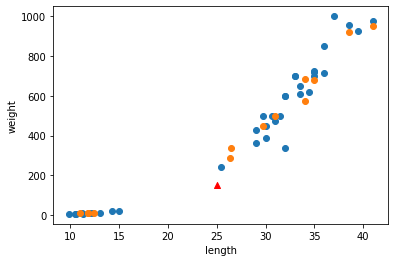

In [35]:
plt.scatter(train_input[:, 0], train_input[:, 1])

plt.scatter(test_input[:, 0], test_input[:, 1])
plt.scatter(k1,k2, marker="^",color='red')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [14]:
### 사이킷런 패키지에는 훈련 및 테스트 데이터를 자동으로 섞어주는 함수 있음
# - train_test_split() 함수 : 섞어주기, 비율로 나누기

In [15]:
# 함수 사용을 위해 불러오기
from sklearn.model_selection import train_test_split

In [16]:
# 훈련 및 테스트데이터 분류하여 가지고 오기..
# 총 4개의 변수값을 반환해 줍니다.

# test_size : 테스트데이터의 비율
# train_size : 훈련데이터의 비율
# 기본적으로 train : test = 75 : 25의 비율을 사용
# (대략적인 비율)
# 일반적으로 훈련과 테스트 비율은 7:3 또는 7.5:2.5를 사용..

train_input, test_input, train_target, test_target = \
train_test_split(fish_data, fish_target, test_size=0.25, random_state=42)

### 훈련과 테스트 데이터의 구분 비율 확인하기..
# - 구분 비율은 train과 target으로 비율을 체크합니다.
# - 비율 계산해 주세요..

In [17]:
print(train_input)
print('---------------------')
print(test_input)
print('---------------------')
print(train_target)
print('---------------------')
print(test_target)

[[  30.   450. ]
 [  29.   363. ]
 [  29.7  500. ]
 [  11.3    8.7]
 [  11.8   10. ]
 [  13.    12.2]
 [  32.   600. ]
 [  30.7  500. ]
 [  33.   700. ]
 [  35.   700. ]
 [  41.   975. ]
 [  38.5  920. ]
 [  25.4  242. ]
 [  12.     9.8]
 [  39.5  925. ]
 [  29.7  450. ]
 [  37.  1000. ]
 [  31.   500. ]
 [  10.5    7.5]
 [  26.3  290. ]
 [  34.   685. ]
 [  26.5  340. ]
 [  10.6    7. ]
 [   9.8    6.7]
 [  35.   680. ]
 [  11.2    9.8]
 [  31.   475. ]
 [  34.5  620. ]
 [  33.5  610. ]
 [  15.    19.9]
 [  34.   575. ]
 [  30.   390. ]
 [  11.8    9.9]
 [  32.   600. ]
 [  36.   850. ]
 [  11.     9.7]]
---------------------
[[ 32.  340. ]
 [ 12.4  13.4]
 [ 14.3  19.7]
 [ 12.2  12.2]
 [ 33.  700. ]
 [ 36.  714. ]
 [ 35.  720. ]
 [ 35.  725. ]
 [ 38.5 955. ]
 [ 33.5 650. ]
 [ 31.5 500. ]
 [ 29.  430. ]
 [ 41.  950. ]]
---------------------
[1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]
---------------------
[1. 0. 0. 0. 1

In [18]:
print('train데이터와 test데이터의 비율 = ', \
      round(len(train_input) / (len(train_input) + len(test_input)),2), \
      ' : ', \
      round(len(test_input) / (len(train_input) + len(test_input)), 2))

train데이터와 test데이터의 비율 =  0.73  :  0.27


In [19]:
# 훈련데이터 차원 확인하기
print(train_input.shape, train_target.shape)

(36, 2) (36,)


In [20]:
# 테스트데이터 차원 확인하기
print(test_input.shape, test_target.shape)

(13, 2) (13,)


In [21]:
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [22]:
### 샘플링 편향을 최소화 하기 위한 방법으로
# - stratify 속성을 사용..
# - 속성에는 기준값을 넣어줍니다. (보통 종속데이터)
# - 종속데이터의 분류 값을 기준으로 test_size의 비율로 섞어줍니다.
train_input, test_input, train_target, test_target = \
train_test_split(fish_data, fish_target, stratify = fish_target, test_size=0.25, random_state=42)

In [23]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

### 특정 위치의 생선 예측하기
##### - 특정 위치의 생선 : 예측 데이터 1개 사용

In [24]:
### [문제]
# - 생선의 길이와 무게가 25cm, 150g
# - 이 생선은 도미? 빙어?
# 1. 훈련데이터를 산점도로 시각화하여 대략 위의 생선 위치를 눈으로 확인
# 2. 모델 객체 생성 > 3.훈련데이터 학습 > 4. 정확도 확인 > 5. 위의 생선 예측
# 6. 산점도 그래프 시각화
#  [훈련데이터에 대한 산점도와 위 생선 한개 위치 까지 포함해서]

In [31]:
k1 = [25]
k2 = [150]
### numpy가 제공하는 함수를 이용한 2차원 데이터 생성하기
# 샘플
k = np.column_stack((k1,k2))
k

array([[ 25, 150]])

In [38]:
kn = KNeighborsClassifier()
train_input, test_input, train_target, test_target = \
train_test_split(fish_data, fish_target, test_size=0.25, random_state=42)
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [40]:
pred = kn.predict(k)
pred

array([0.])

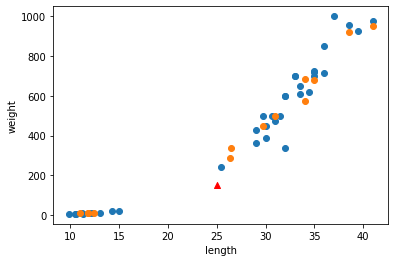

In [36]:
plt.scatter(train_input[:, 0], train_input[:, 1])

plt.scatter(test_input[:, 0], test_input[:, 1])
plt.scatter(k1,k2, marker="^",color='red')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [41]:
### 클래스 객체 생성
from sklearn.neighbors import KNeighborsClassifier

In [42]:
kn = KNeighborsClassifier()

In [43]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [44]:
kn.score(test_input,test_target)

1.0

In [46]:
kn.predict([[25,150]])

array([0.])

In [48]:
### 사용된 이웃값 확인하기
# - 모델 생성시 기본 5개의 이웃으로 지정되어 훈련이 됩니다.
# - 이웃 5개의 값을 추출하기 위해서는 kneightbors() 함수를 사용합니다.
# - kneighbors()함수의 반환값은 2개..
# - 첫번째 값은 : 특정 생선과 이웃과의 거리(오츰차순으로 나옴)
# - 두번재 값은 : 이웃 5개의 실제 위치(인덱스번호)
distances, indexes = kn.kneighbors([[25,150]])
print(distances)
print(indexes)

[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]
[[12 29  5 19  4]]


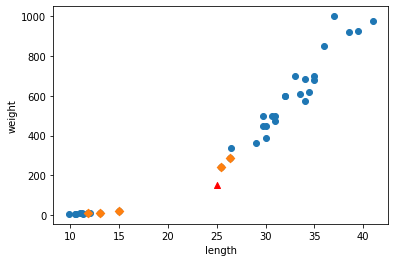

In [53]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25,150, marker="^",color='red')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = "D")

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [54]:
### [해석]
# - x축의 범위와 y축의 범위가 너무 큰 차이로 나타난 현상
# - x축의 범위 : 10~40
# - y축의 범위 : 0~1000
# - 두 축의 범위 값이 너무 크게 차이가 나서 발생
# - y축으로 조금만 올라가도 거리는 크게 벌어집니다
# - 도미들의 위치가 위로 조금만 올라가도 거리는 크게 벌어집니다

# - 이런 현상을 '스케일이 다르다'라고 해석합니다
# - 분석 시 매우 흔하게 발생하는 현상으로 전처리를 꼭 해주어야 합니다
# - 전처리 방법 : x축과 y축의 값을 동일하게 맞춰주어야 합니다

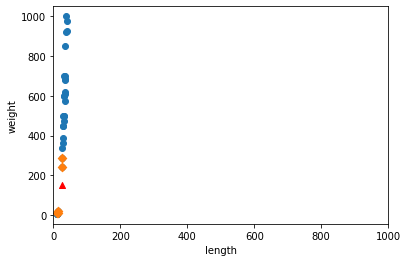

In [55]:
# 산점도 scatter()
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25,150, marker="^",color='red')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = "D")

plt.xlim(0,1000)
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

## 스케일 동일하게 맞추기 (전처리)
##### - 스케일을 맞추는 전처리 방법으로는 "표준점수(standard score)" 를 사용
##### - 표준점수 : 각 데이터가 원점(0)에서 몇 표준편차 만큼 떨어져 있는지를 나타내는 값
##### - 표준점수 계산공식
##### = (각 데이터값 - 데이터세트 전체평균값) / 데이터세트 전체 표준편차값
##### - 평균, 표준편차 계산은 모두 넘파이(Numpy)에서 제공하는 함수를 사용합니다.

In [56]:
# 훈련데이터 전체 평균 구하기
mean = np.mean(train_input, axis = 0)
mean

array([ 26.175     , 418.08888889])

In [57]:
# 훈련데이터 전체 표준편차 구하기
std = np.std(train_input, axis = 0)
std

array([ 10.21073441, 321.67847023])

In [58]:
# 표준점수 데이터 계산하여 훈련데이터 재생성하기
train_scaled = (train_input - mean) / std
train_scaled

array([[ 0.37460577,  0.09920189],
       [ 0.27666962, -0.17125451],
       [ 0.34522492,  0.2546366 ],
       [-1.45680021, -1.27266487],
       [-1.40783213, -1.26862357],
       [-1.29030875, -1.26178444],
       [ 0.57047806,  0.56550602],
       [ 0.44316107,  0.2546366 ],
       [ 0.66841421,  0.87637544],
       [ 0.86428651,  0.87637544],
       [ 1.4519034 ,  1.73126635],
       [ 1.20706303,  1.56028817],
       [-0.07590051, -0.54740651],
       [-1.3882449 , -1.26924531],
       [ 1.30499918,  1.57583164],
       [ 0.34522492,  0.09920189],
       [ 1.06015881,  1.80898371],
       [ 0.47254192,  0.2546366 ],
       [-1.53514913, -1.2763953 ],
       [ 0.01224202, -0.39818919],
       [ 0.76635036,  0.82974503],
       [ 0.03182925, -0.24275448],
       [-1.52535551, -1.27794965],
       [-1.60370443, -1.27888226],
       [ 0.86428651,  0.81420156],
       [-1.46659382, -1.26924531],
       [ 0.47254192,  0.17691924],
       [ 0.81531843,  0.6276799 ],
       [ 0.71738229,

### 스케일로 훈련데이터 재생성 후에는 훈련모델도 재생성

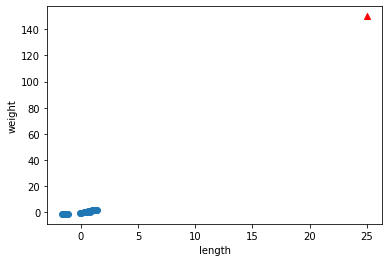

In [69]:
# 산점도 scatter()
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25,150, marker="^",color='red')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### (해석)
# - 훈련데이터는 스케일을 맞추었지만,
# - 예측데이터는 스케일을 맞추지 못해서 발생한 현상
# - 예측데이터 한개도 스케일 작업을 해줘야 합니다
# -- 한개의 예측데이터 스케일 작업은
# -- 훈련데이터를 사용하여 계산된 평균과 표준편차 값을 사용해야 합니다.

In [68]:
# 예측 데이터 스케일 작업하기
new = ([25,150] - mean) / std
new

array([-0.11507497, -0.83340638])

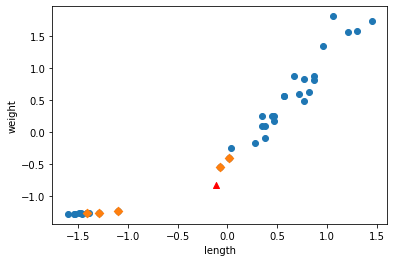

In [71]:
# 산점도 scatter()
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker="^",color='red')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = "D")

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### (해석)
# - 훈련데이터는 스케일을 맞추었지만,
# - 예측데이터는 스케일을 맞추지 못해서 발생한 현상
# - 예측데이터 한개도 스케일 작업을 해줘야 합니다
# -- 한개의 예측데이터 스케일 작업은
# -- 훈련데이터를 사용하여 계산된 평균과 표준편차 값을 사용해야 합니다.

##### [문제]
##### -직접 훈련>검증>테스트>산점도 그리기(이웃까지 모두 포함)

In [73]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [75]:
mean = np.mean(test_input, axis = 0)
std = np.std(test_input, axis = 0)
# 표준점수 데이터 계산하여 훈련데이터 재생성하기
test_scaled = (test_input - mean) / std
test_scaled
kn.score(test_scaled, test_target)

1.0

In [85]:
distances, indexes = kn.kneighbors(test_scaled)
print(distances)
print(indexes)

[[0.29433276 0.33941725 0.38047704 0.38599671 0.47729719]
 [0.34510166 0.38933968 0.39483337 0.42839921 0.44297698]
 [0.26713927 0.27637587 0.27720397 0.2974973  0.30557229]
 [0.36023052 0.40639406 0.41214581 0.44632464 0.46123092]
 [0.20191363 0.20191363 0.31240328 0.32033658 0.32842369]
 [0.03603772 0.12159673 0.12159673 0.13276489 0.14718217]
 [0.06329145 0.06329145 0.1422395  0.23439288 0.23660663]
 [0.07870862 0.07870862 0.14647927 0.23715325 0.24401251]
 [0.02186973 0.32998514 0.41959442 0.46523878 0.48843783]
 [0.15784713 0.16454532 0.17374261 0.2149544  0.2149544 ]
 [0.13375015 0.1668579  0.20428639 0.22469107 0.25966836]
 [0.08855632 0.14140119 0.27637979 0.34352913 0.46464974]
 [0.21797172 0.24693112 0.25241049 0.45847763 0.4898657 ]]
[[19 12  1 21 31]
 [23 18 22 35 25]
 [23 18 22 35 25]
 [23 18 22 35 25]
 [ 6 33  2  7 17]
 [28  6 33 27 30]
 [ 6 33 28 30 27]
 [ 6 33 28 27 30]
 [34 11 14 16  9]
 [ 7 17  2 33  6]
 [ 1 31 15  0 21]
 [21 19 12  1 31]
 [11 34 14 10 16]]


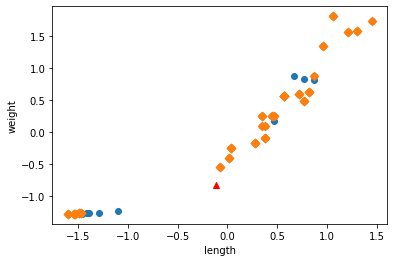

In [90]:
# 산점도 scatter()
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker="^",color='red')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = "D")

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### (해석)
# - 훈련데이터는 스케일을 맞추었지만,
# - 예측데이터는 스케일을 맞추지 못해서 발생한 현상
# - 예측데이터 한개도 스케일 작업을 해줘야 합니다
# -- 한개의 예측데이터 스케일 작업은
# -- 훈련데이터를 사용하여 계산된 평균과 표준편차 값을 사용해야 합니다.